# Clustering with Hiearchichal method - NYC collisions dataset

imports and data loading:

In [2]:
from pandas import DataFrame, read_csv
from matplotlib.pyplot import subplots, show
from ds_charts import choose_grid, plot_clusters, plot_line, multiple_bar_chart, compute_mse, compute_centroids

data: DataFrame = read_csv('data/pca2_balanced.csv')
data.pop('PERSON_INJURY')
v1 = 0
v2 = 1

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
rows, cols = choose_grid(len(N_CLUSTERS))

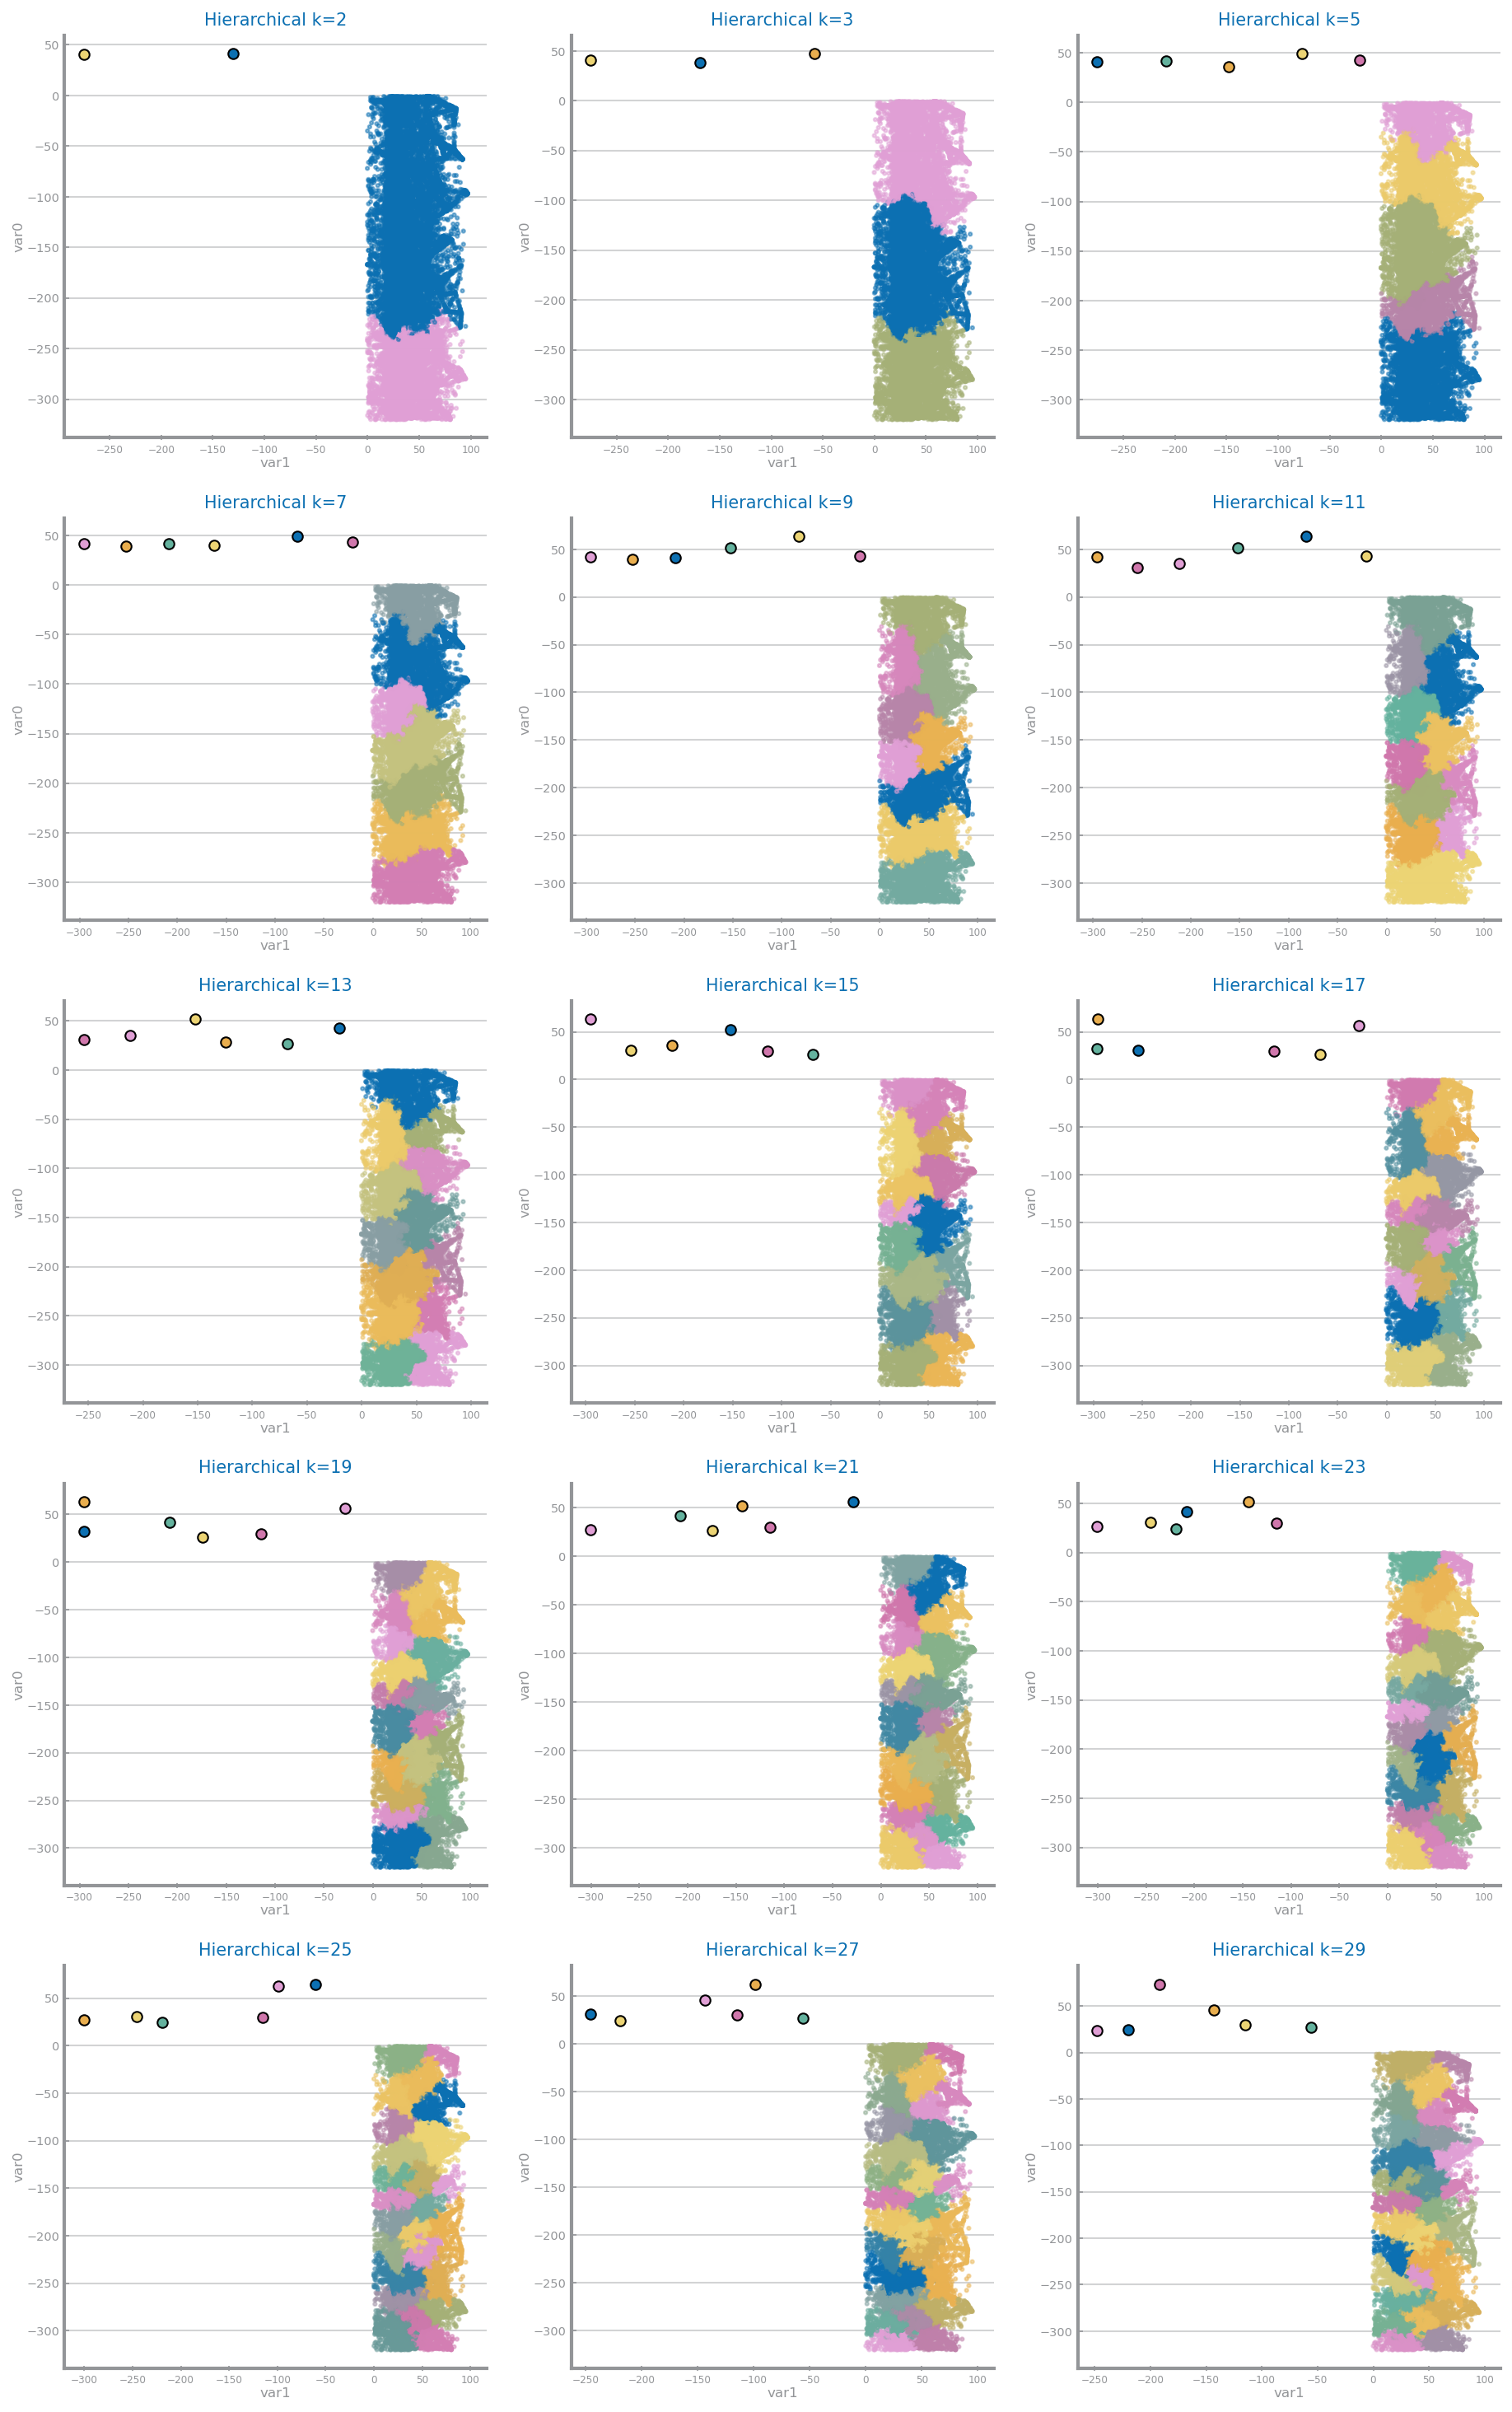

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

mse: list = []
sc: list = []
rows, cols = choose_grid(len(N_CLUSTERS))
_, axs = subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    estimator = AgglomerativeClustering(n_clusters=k)
    estimator.fit(data)
    labels = estimator.labels_
    centers = compute_centroids(data, labels)
    mse.append(compute_mse(data.values, labels, centers))
    sc.append(silhouette_score(data, labels))
    plot_clusters(data, v2, v1, labels, centers, k, f'Hierarchical k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
show()

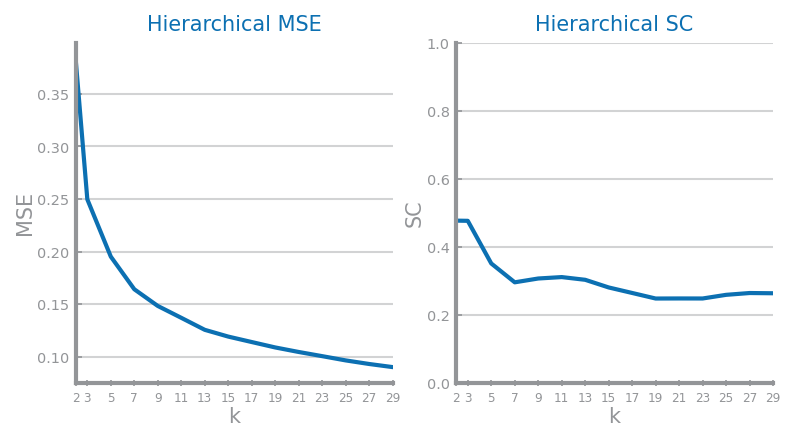

In [4]:
fig, ax = subplots(1, 2, figsize=(6, 3), squeeze=False)
plot_line(N_CLUSTERS, mse, title='Hierarchical MSE', xlabel='k', ylabel='MSE', ax=ax[0, 0])
plot_line(N_CLUSTERS, sc, title='Hierarchical SC', xlabel='k', ylabel='SC', ax=ax[0, 1], percentage=True)
show()

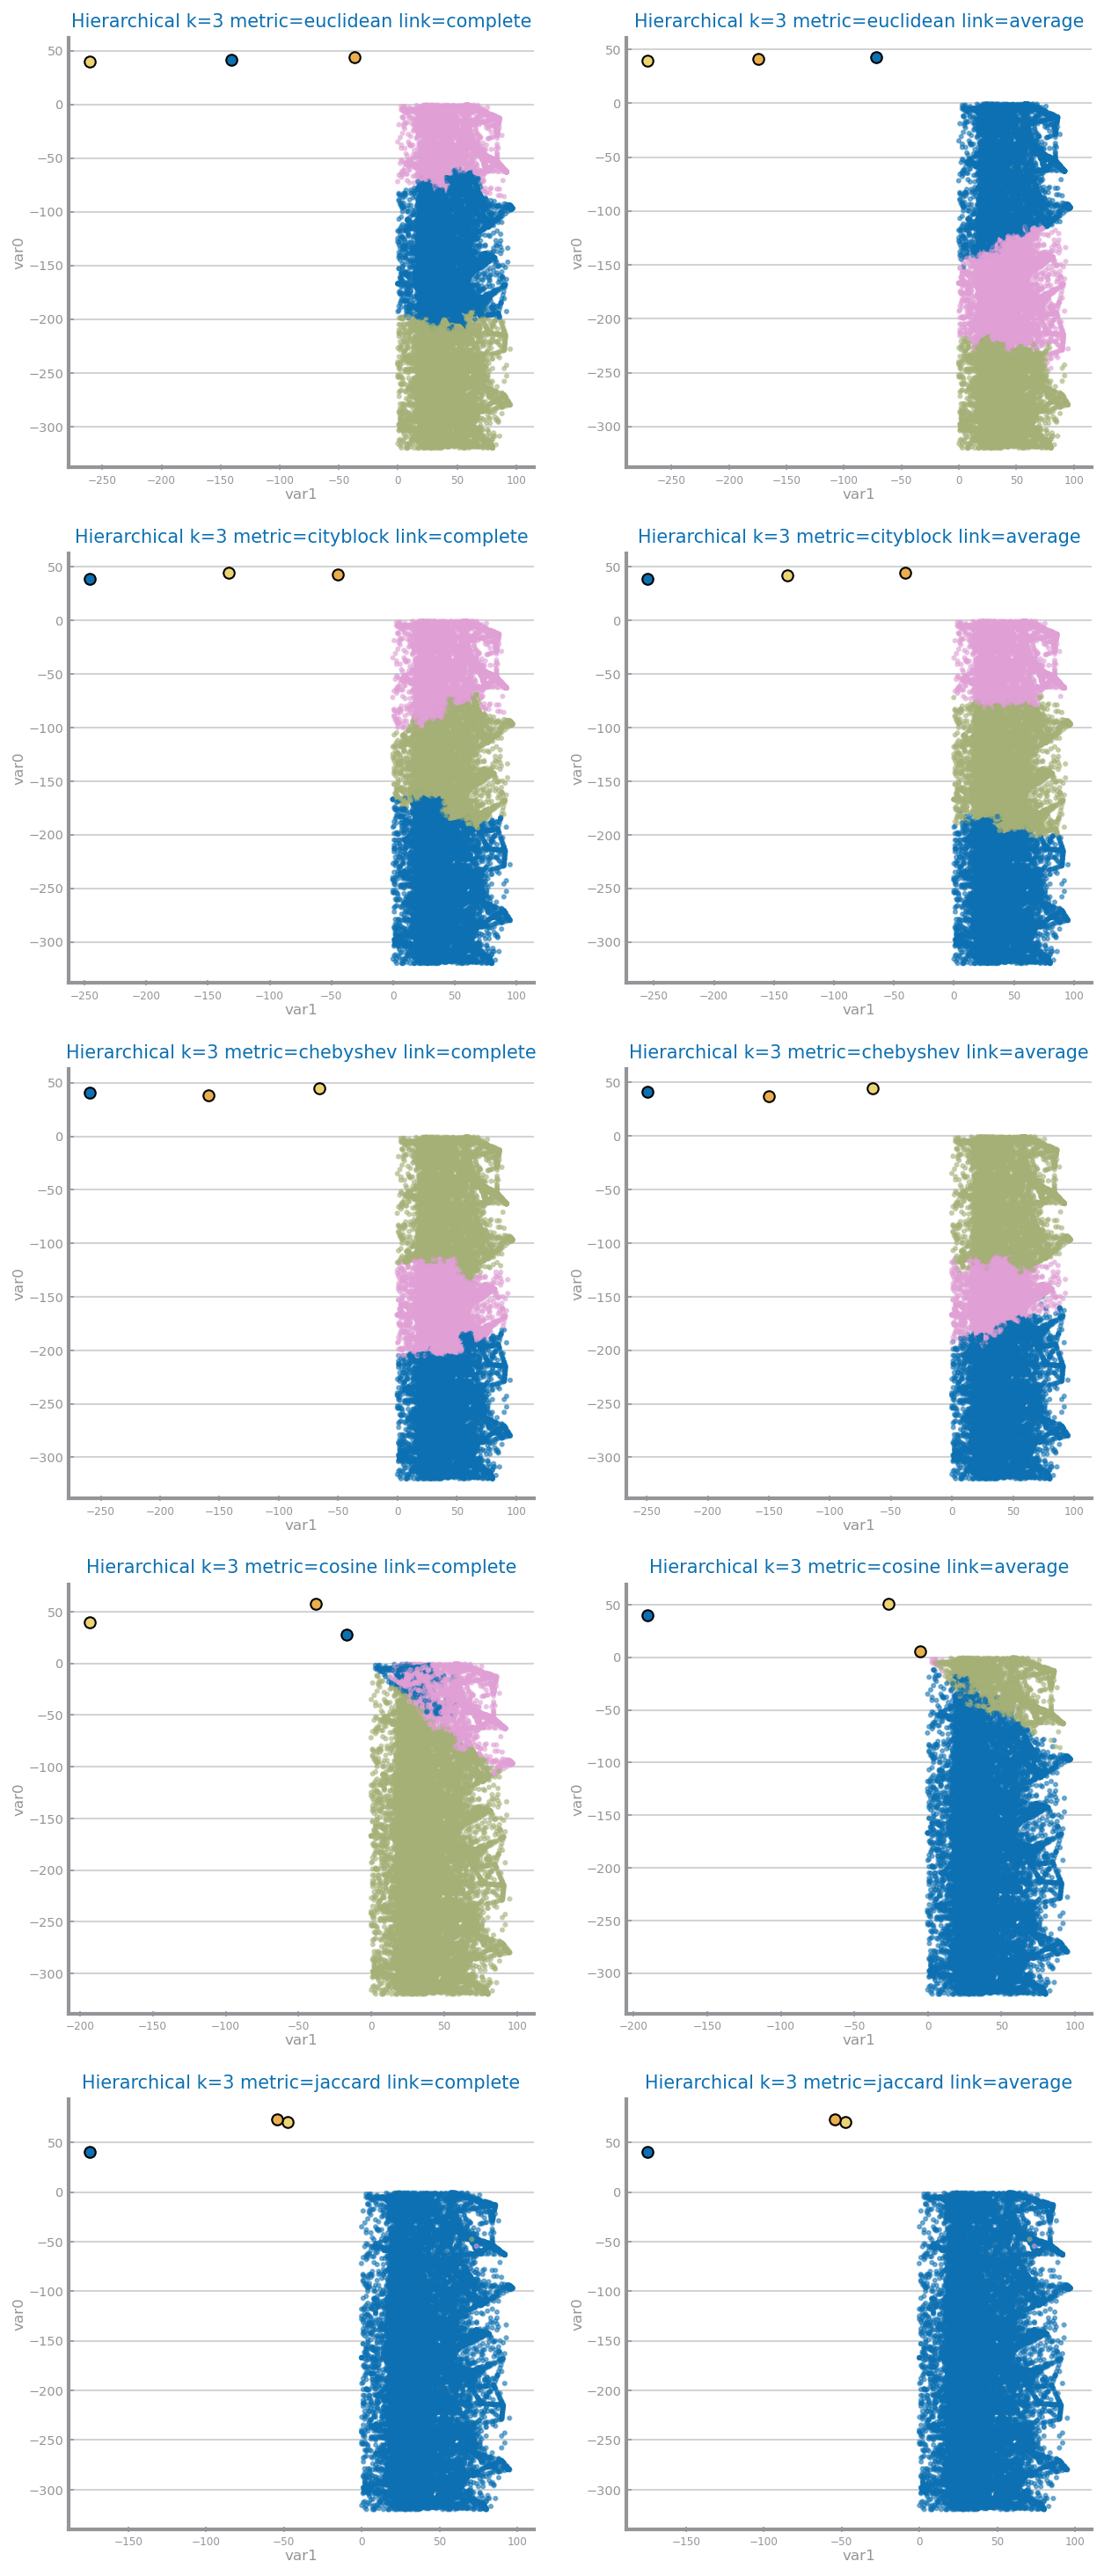

In [5]:
METRICS = ['euclidean', 'cityblock', 'chebyshev', 'cosine', 'jaccard']
LINKS = ['complete', 'average']
k = 3
values_mse = {}
values_sc = {}
rows = len(METRICS)
cols = len(LINKS)
_, axs = subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
for i in range(len(METRICS)):
    mse: list = []
    sc: list = []
    m = METRICS[i]
    for j in range(len(LINKS)):
        link = LINKS[j]
        estimator = AgglomerativeClustering(n_clusters=k, linkage=link, affinity=m )
        estimator.fit(data)
        labels = estimator.labels_
        centers = compute_centroids(data, labels)
        mse.append(compute_mse(data.values, labels, centers))
        sc.append(silhouette_score(data, labels))
        plot_clusters(data, v2, v1, labels, centers, k, f'Hierarchical k={k} metric={m} link={link}', ax=axs[i,j])
    values_mse[m] = mse
    values_sc[m] = sc
show()

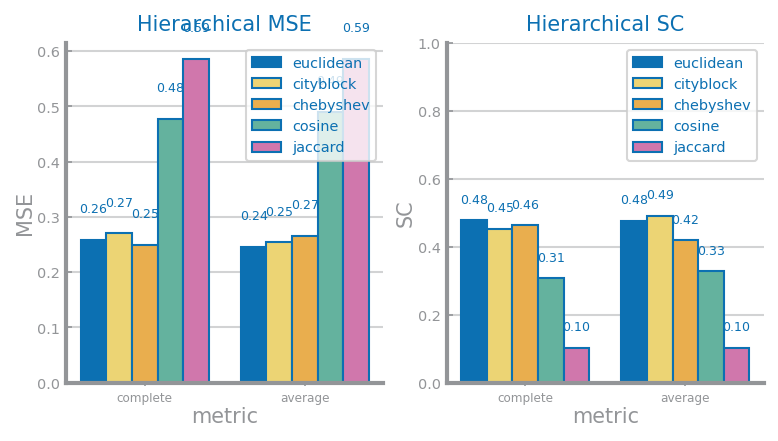

In [6]:
_, ax = subplots(1, 2, figsize=(6, 3), squeeze=False)
multiple_bar_chart(LINKS, values_mse, title=f'Hierarchical MSE', xlabel='metric', ylabel='MSE', ax=ax[0, 0])
multiple_bar_chart(LINKS, values_sc, title=f'Hierarchical SC', xlabel='metric', ylabel='SC', ax=ax[0, 1], percentage=True)
show()